In [5]:
import numpy as np   
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

In [6]:
df = pd.read_csv('US_Heart_Patients_2.csv')

In [7]:
df.shape

(4240, 22)

In [8]:
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,...,BMI,heartRate,glucose,Heart-Att,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,...,26.97,80.0,77.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,...,28.73,95.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,...,25.34,75.0,70.0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,...,28.58,65.0,103.0,1,NaN,NaN,NaN,NaN,NaN,NaN
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,...,23.10,85.0,85.0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4232 non-null   object 
 1   age              4238 non-null   float64
 2   education        4130 non-null   float64
 3   currentSmoker    4237 non-null   float64
 4   cigsPerDay       4209 non-null   float64
 5   BP Meds          4180 non-null   float64
 6   prevalentStroke  4231 non-null   float64
 7   prevalentHyp     4238 non-null   float64
 8   diabetes         4238 non-null   float64
 9   tot cholesterol  4180 non-null   float64
 10  Systolic BP      4236 non-null   float64
 11  Diastolic BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   int64  
 16  Unnamed: 16      0 non-null      float64
 17  Unnamed: 17   

In [10]:
cat = ['education','currentSmoker','BP Meds','prevalentStroke','prevalentHyp','diabetes','Gender']
num = ['age','cigsPerDay','tot cholesterol','Systolic BP','Diastolic BP','BMI','heartRate','glucose']

In [11]:
round(df[num].describe().T,2)

,count,mean,std,min,25%,50%,75%,max
age,4238.0,49.58,8.57,32.00,42.00,49.0,56.00,70.0
cigsPerDay,4209.0,9.00,11.92,0.00,0.00,0.0,20.00,70.0
tot cholesterol,4180.0,236.68,44.62,107.00,206.00,234.0,263.00,696.0
Systolic BP,4236.0,132.36,22.04,83.50,117.00,128.0,144.00,295.0
Diastolic BP,4235.0,82.90,11.91,48.00,75.00,82.0,90.00,142.5
BMI,4216.0,25.80,4.08,15.54,23.07,25.4,28.04,56.8
heartRate,4236.0,75.87,12.00,44.00,68.00,75.0,83.00,143.0
glucose,3849.0,81.95,23.96,40.00,71.00,78.0,87.00,394.0


In [12]:
df.columns

Index(['Gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BP Meds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'tot cholesterol',
       'Systolic BP', 'Diastolic BP', 'BMI', 'heartRate', 'glucose',
       'Heart-Att', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21'],
      dtype='object')

In [13]:
df.isnull().sum()*100/df.shape[0]

Gender               0.188679
age                  0.047170
education            2.594340
currentSmoker        0.070755
cigsPerDay           0.731132
BP Meds              1.415094
prevalentStroke      0.212264
prevalentHyp         0.047170
diabetes             0.047170
tot cholesterol      1.415094
Systolic BP          0.094340
Diastolic BP         0.117925
BMI                  0.566038
heartRate            0.094340
glucose              9.221698
Heart-Att            0.000000
Unnamed: 16        100.000000
Unnamed: 17        100.000000
Unnamed: 18        100.000000
Unnamed: 19        100.000000
Unnamed: 20        100.000000
Unnamed: 21        100.000000
dtype: float64

#### Null Value Treatment

In [14]:
for i in num:
    df[i].fillna(df[i].mean(),inplace= True)

In [15]:
df.isnull().sum()

Gender                8
age                   0
education           110
currentSmoker         3
cigsPerDay            0
BP Meds              60
prevalentStroke       9
prevalentHyp          2
diabetes              2
tot cholesterol       0
Systolic BP           0
Diastolic BP          0
BMI                   0
heartRate             0
glucose               0
Heart-Att             0
Unnamed: 16        4240
Unnamed: 17        4240
Unnamed: 18        4240
Unnamed: 19        4240
Unnamed: 20        4240
Unnamed: 21        4240
dtype: int64

In [16]:
for i in cat:
    df[i].fillna(df[i].mode()[0],inplace= True)

In [17]:
df.isnull().sum()

Gender                0
age                   0
education             0
currentSmoker         0
cigsPerDay            0
BP Meds               0
prevalentStroke       0
prevalentHyp          0
diabetes              0
tot cholesterol       0
Systolic BP           0
Diastolic BP          0
BMI                   0
heartRate             0
glucose               0
Heart-Att             0
Unnamed: 16        4240
Unnamed: 17        4240
Unnamed: 18        4240
Unnamed: 19        4240
Unnamed: 20        4240
Unnamed: 21        4240
dtype: int64

In [18]:
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,...,BMI,heartRate,glucose,Heart-Att,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,...,26.97,80.0,77.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,...,28.73,95.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,...,25.34,75.0,70.0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,...,28.58,65.0,103.0,1,NaN,NaN,NaN,NaN,NaN,NaN
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,...,23.10,85.0,85.0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df['Gender'] = df['Gender'].replace(to_replace=['Male','Female'],value= [1,0])

In [20]:
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,...,BMI,heartRate,glucose,Heart-Att,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,1,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,...,26.97,80.0,77.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,...,28.73,95.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,1,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,...,25.34,75.0,70.0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,...,28.58,65.0,103.0,1,NaN,NaN,NaN,NaN,NaN,NaN
4,0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,...,23.10,85.0,85.0,0,NaN,NaN,NaN,NaN,NaN,NaN


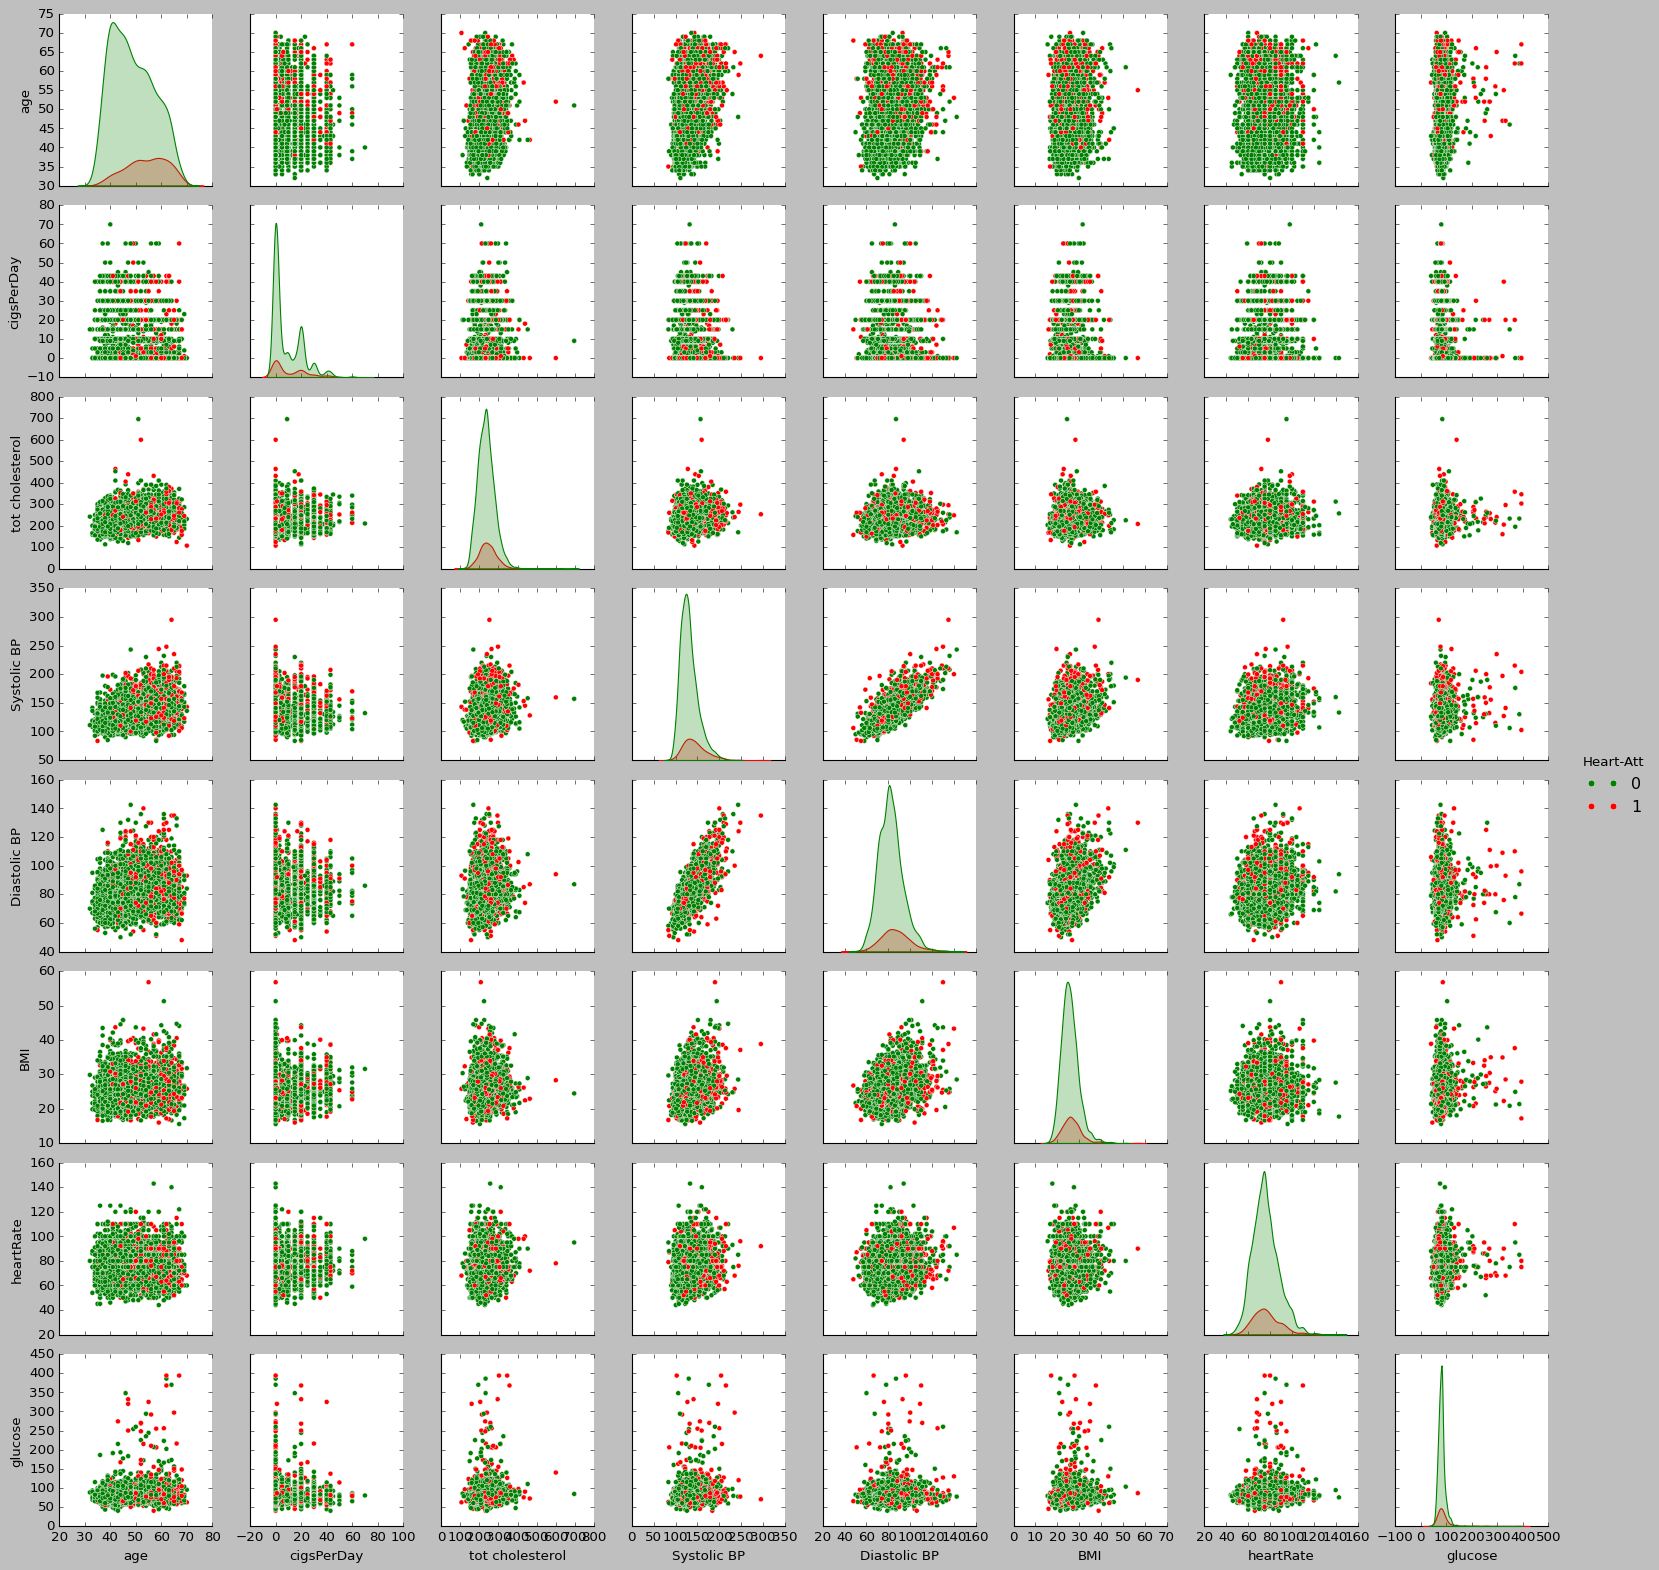

In [21]:
sns.pairplot(df[['age','cigsPerDay','tot cholesterol','Systolic BP','Diastolic BP','BMI','heartRate','glucose','Heart-Att']],
             hue= 'Heart-Att',
              palette= ['Green','Red'])

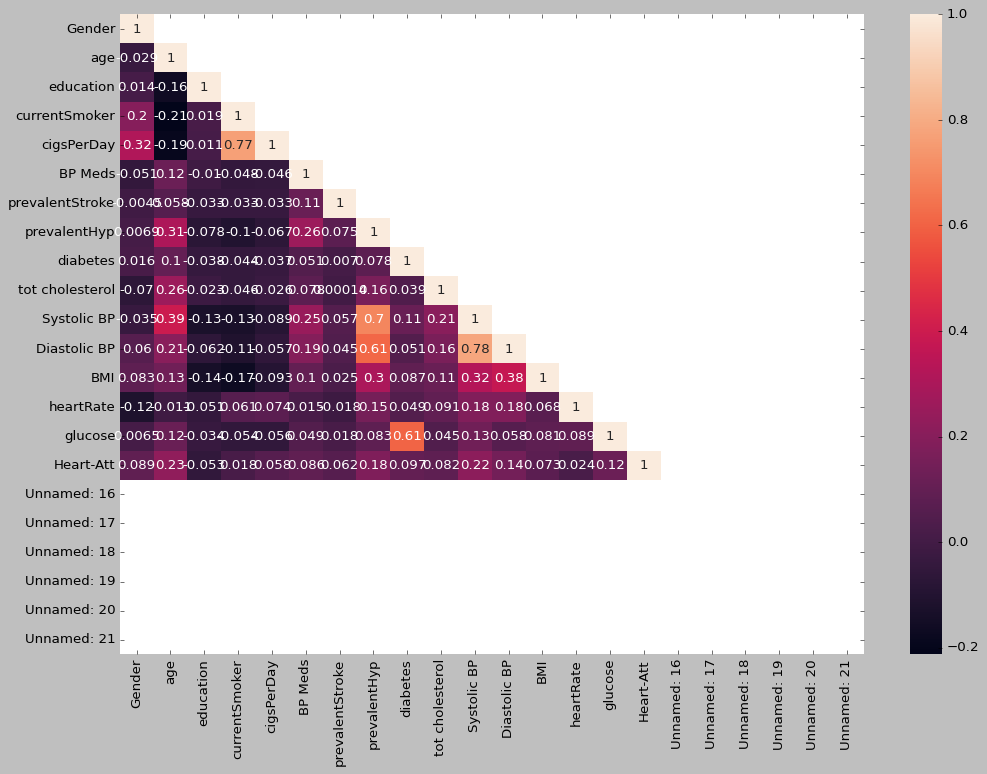

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True,mask=np.triu(df.corr(),+1));

In [23]:
data = df.copy()

In [24]:
df.drop(['diabetes','currentSmoker','Diastolic BP'],axis=1,inplace= True)

In [25]:
df.head()

,Gender,age,education,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,tot cholesterol,Systolic BP,BMI,heartRate,glucose,Heart-Att,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,1,39.0,4.0,0.0,0.0,0.0,0.0,195.0,106.0,26.97,80.0,77.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,0,46.0,2.0,0.0,0.0,0.0,0.0,250.0,121.0,28.73,95.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,1,48.0,1.0,20.0,0.0,0.0,0.0,245.0,127.5,25.34,75.0,70.0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,0,61.0,3.0,30.0,0.0,0.0,1.0,225.0,150.0,28.58,65.0,103.0,1,NaN,NaN,NaN,NaN,NaN,NaN
4,0,46.0,3.0,23.0,0.0,0.0,0.0,285.0,130.0,23.10,85.0,85.0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
Num = ['age','cigsPerDay','tot cholesterol','Systolic BP','BMI','heartRate','glucose']

In [39]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

for column in df[Num].columns: 
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

In [28]:
Num = ['age','cigsPerDay','tot cholesterol','Systolic BP','BMI','heartRate','glucose']

<Axes: >

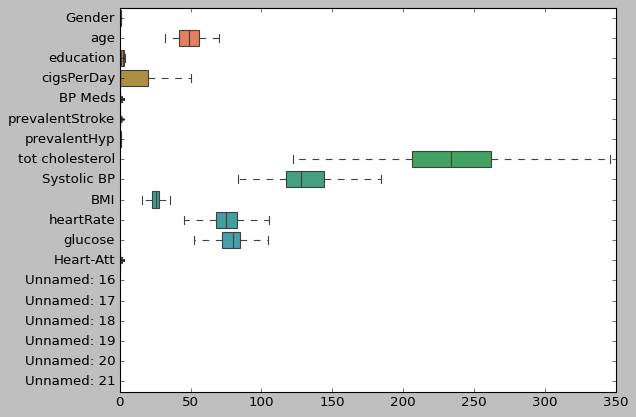

In [40]:
sns.boxplot(df,orient = 'h')

#### Test-Train Split

In [53]:
# Copy all the predictor variables into X dataframe
X = df.drop('Heart-Att', axis=1)

# Copy target into the y dataframe. 
y = df['Heart-Att']

In [54]:
X=X.drop(columns=['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21'])

KeyError: "['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21'] not found in axis"

In [31]:
X.head()

,Gender,age,education,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,tot cholesterol,Systolic BP,BMI,heartRate,glucose,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,1,39.0,4.0,0.0,0.0,0.0,0.0,195.0,106.0,26.97,80.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN
1,0,46.0,2.0,0.0,0.0,0.0,0.0,250.0,121.0,28.73,95.0,76.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1,48.0,1.0,20.0,0.0,0.0,0.0,245.0,127.5,25.34,75.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN
3,0,61.0,3.0,30.0,0.0,0.0,1.0,225.0,150.0,28.58,65.0,103.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,46.0,3.0,23.0,0.0,0.0,0.0,285.0,130.0,23.10,85.0,85.0,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
X.head()

,Gender,age,education,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,tot cholesterol,Systolic BP,BMI,heartRate,glucose,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,1,39.0,4.0,0.0,0.0,0.0,0.0,195.0,106.0,26.97,80.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN
1,0,46.0,2.0,0.0,0.0,0.0,0.0,250.0,121.0,28.73,95.0,76.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1,48.0,1.0,20.0,0.0,0.0,0.0,245.0,127.5,25.34,75.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN
3,0,61.0,3.0,30.0,0.0,0.0,1.0,225.0,150.0,28.58,65.0,103.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,46.0,3.0,23.0,0.0,0.0,0.0,285.0,130.0,23.10,85.0,85.0,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Heart-Att, dtype: int64

In [44]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [45]:
model = LogisticRegression()

In [50]:
model.fit(X_train,y_train)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

#### Model Evaluation

In [48]:
y_train_predict = model.predict(X_train)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [359]:
y_train_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [363]:
## Accuracy of the Model
model.score(X_train,y_train)

0.8466981132075472

##### Confusion Matrix

Text(0.5, 1.0, 'CONFUSION MATRIX - CUT OFF (0.5)')

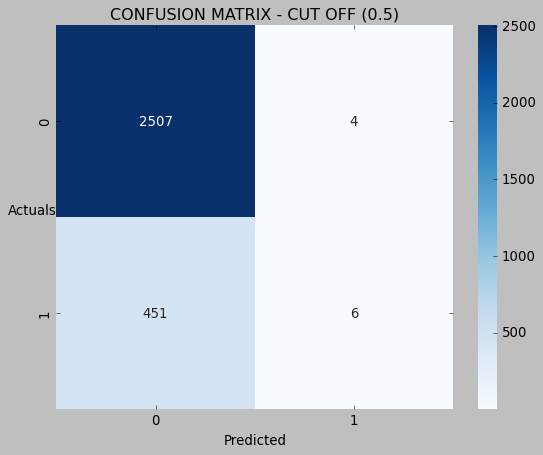

In [368]:
sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

In [366]:
metrics.confusion_matrix(y_train,y_train_predict)

array([[2507,    4],
       [ 451,    6]], dtype=int64)

### Model Evaluation

The **Confusion Matrix**, is a key tool used to evaluate the performance of classification models. It is a table that compares the actual values of the target variable with the predicted values from the model. The matrix helps to understand how well the model is performing and provides a breakdown of correct and incorrect predictions for each class.

### Structure of the Confusion Matrix

For a **binary classification** problem, the matrix is typically represented as a 2x2 table:

|                      | Predicted Positive | Predicted Negative |
|----------------------|--------------------|--------------------|
| **Actual Positive**  | True Positive (TP) | False Negative (FN) |
| **Actual Negative**  | False Positive (FP) | True Negative (TN) |

1. **True Positive (TP)**:  
   The number of instances correctly predicted as positive (actual positive and predicted positive).

2. **True Negative (TN)**:  
   The number of instances correctly predicted as negative (actual negative and predicted negative).

3. **False Positive (FP)** (Type I Error):  
   The number of instances incorrectly predicted as positive (actual negative but predicted positive).

4. **False Negative (FN)** (Type II Error):  
   The number of instances incorrectly predicted as negative (actual positive but predicted negative).

---

### Metrics Derived from the Classification Report

The matrix can be used to calculate various metrics to evaluate the model's performance:

1. **Accuracy**:  
   The ratio of correctly predicted instances (both positive and negative) to the total instances.  
   Formula:  
   Accuracy = (TP + TN) / (TP + TN + FP + FN)

2. **Precision** (Positive Predictive Value):  
   The ratio of correctly predicted positive instances to all instances predicted as positive.  
   Formula:  
   Precision = TP / (TP + FP)

3. **Recall** (Sensitivity or True Positive Rate):  
   The ratio of correctly predicted positive instances to all actual positive instances.  
   Formula:  
   Recall = TP / (TP + FN)

4. **Specificity** (True Negative Rate):  
   The ratio of correctly predicted negative instances to all actual negative instances.  
   Formula:  
   Specificity = TN / (TN + FP)

5. **F1 Score**:  
   The harmonic mean of precision and recall, providing a balance between the two.  
   Formula:  
   F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

6. **False Positive Rate (FPR)**:  
   The ratio of incorrectly predicted positive instances to all actual negative instances.  
   Formula:  
   FPR = FP / (FP + TN)

---

### Example of a Classification Matrix

Suppose we have a dataset with 100 instances. The actual and predicted results are as follows:

| Actual/Predicted | Positive | Negative |
|-------------------|----------|----------|
| Positive          | 50       | 10       |
| Negative          | 5        | 35       |

- TP = 50  
- FN = 10  
- FP = 5  
- TN = 35  

From this, we can calculate:

- **Accuracy**: (50 + 35) / 100 = 85%  
- **Precision**: 50 / (50 + 5) = 91%  
- **Recall**: 50 / (50 + 10) = 83.3%  
- **F1 Score**: 2 * (0.91 * 0.833) / (0.91 + 0.833) ≈ 0.87 or 87%  

---

### Advantages of the Classification Report
1. Provides a clear breakdown of correct and incorrect predictions.  
2. Allows the calculation of multiple performance metrics.  
3. Can be extended to multi-class classification problems.

---

### Challenges
1. It does not provide a single summary measure of performance.  
2. For imbalanced datasets, accuracy can be misleading, requiring focus on precision, recall, or F1 Score.  

The classification matrix is fundamental for evaluating and fine-tuning classification models. It helps to understand where the model is making mistakes and guides improvements.

The **ROC (Receiver Operating Characteristic) Curve** is a graphical representation used to evaluate the performance of a binary classification model. It shows the trade-off between the **True Positive Rate (TPR)** and the **False Positive Rate (FPR)** at various threshold values.

---

### Key Components of the ROC Curve

1. **True Positive Rate (TPR)**:  
   Also called **Recall** or **Sensitivity**, it measures how well the model identifies positive instances.  
   Formula:  
   TPR = TP / (TP + FN)  

2. **False Positive Rate (FPR)**:  
   It measures the proportion of negative instances incorrectly classified as positive.  
   Formula:  
   FPR = FP / (FP + TN)  

3. **Threshold**:  
   The decision boundary used to classify an instance as positive or negative. By varying the threshold, we get different TPR and FPR values, which form the ROC curve.

4. **Diagonal Line**:  
   The diagonal line (from (0, 0) to (1, 1)) represents a random classifier. A model whose ROC curve is closer to this diagonal is no better than random guessing.

---

### How to Plot an ROC Curve

- **X-axis**: False Positive Rate (FPR).  
- **Y-axis**: True Positive Rate (TPR).  
- The curve is generated by varying the classification threshold and plotting the TPR against the FPR.

---

### Area Under the Curve (AUC)

The **Area Under the Curve (AUC)** is a single scalar value that quantifies the overall performance of the model:

- **AUC = 1**: Perfect classifier (always correct).  
- **AUC = 0.5**: Random guessing.  
- **AUC < 0.5**: Worse than random guessing (indicates a flawed model).

The closer the AUC is to 1, the better the model's performance.

---

### Interpretation of the ROC Curve

1. **Steep Curve**:  
   A steep curve that quickly reaches a high TPR with a low FPR indicates a highly effective model.

2. **Close to Diagonal**:  
   If the curve is close to the diagonal, the model has poor discrimination ability.

3. **Threshold Selection**:  
   The ROC curve helps identify an optimal threshold, balancing the trade-off between FPR and TPR based on the specific use case.

---

### Example of ROC Curve Points

Suppose we have a binary classification model, and the following confusion matrix values are calculated for various thresholds:

| Threshold | TPR   | FPR   |
|-----------|-------|-------|
| 0.9       | 0.2   | 0.1   |
| 0.7       | 0.6   | 0.2   |
| 0.5       | 0.8   | 0.3   |
| 0.3       | 0.9   | 0.5   |
| 0.1       | 1.0   | 0.7   |

By plotting these points, we can generate the ROC curve.

---

### Applications of the ROC Curve

1. **Model Evaluation**:  
   Used to compare different classification models and choose the best one.  

2. **Threshold Selection**:  
   Helps in selecting a threshold that balances sensitivity and specificity based on the application's requirements.

3. **Imbalanced Datasets**:  
   ROC curves are especially useful for imbalanced datasets where accuracy may be misleading.

---


#### Model Parameters

Here is a detailed explanation of the parameters you provided for Logistic Regression, along with their definitions and applications:

---

### **1. `penalty`**
- **Definition**: Specifies the type of regularization applied to the model to prevent overfitting.
- **Possible Values**:
  - `'l1'`: L1 regularization (Lasso) encourages sparsity by reducing some coefficients to 0.
  - `'l2'`: L2 regularization (Ridge) penalizes large coefficients.
  - `'elasticnet'`: Combination of L1 and L2 regularization.
  - `'none'`: No regularization.
- **Application**: Use L1 for feature selection, L2 for general regularization, and ElasticNet when you need a combination of both.

---

### **2. `dual`**
- **Definition**: Indicates whether to solve the dual optimization problem.
- **Possible Values**:
  - `True`: Use dual formulation.
  - `False`: Use primal formulation (default).
- **Application**: The dual formulation is useful when the number of samples (\( n \)) is less than the number of features (\( p \)).

---

### **3. `tol`**
- **Definition**: Tolerance for stopping criteria. Specifies the threshold for optimization convergence.
- **Default**: `0.0001`
- **Application**: Lower values make the optimization more precise but slower. Higher values can speed up training at the cost of accuracy.

---

### **4. `C`**
- **Definition**: Inverse of regularization strength. \( C = \frac{1}{\lambda} \), where \( \lambda \) is the regularization parameter.
- **Default**: `1.0`
- **Application**: Larger values of \( C \) reduce regularization, potentially leading to overfitting. Smaller values increase regularization, reducing overfitting but possibly underfitting the data.

---

### **5. `fit_intercept`**
- **Definition**: Specifies whether to include an intercept (bias term) in the model.
- **Default**: `True`
- **Application**: Set to `True` if you want to account for the baseline prediction when all features are zero. Set to `False` if the data is already centered.

---

### **6. `intercept_scaling`**
- **Definition**: Applies scaling to the intercept term when the solver is `'liblinear'` and `fit_intercept=True`.
- **Default**: `1`
- **Application**: Rarely used, but can help adjust the intercept when features are scaled.

---

### **7. `class_weight`**
- **Definition**: Weights associated with each class to handle imbalanced datasets.
- **Possible Values**:
  - `None`: Equal weight for all classes (default).
  - `'balanced'`: Adjusts weights inversely proportional to class frequencies.
  - Dictionary: Custom weights for each class.
- **Application**: Use `'balanced'` or a dictionary when working with highly imbalanced datasets.

---

### **8. `random_state`**
- **Definition**: Controls the randomness of algorithms that rely on random initialization (e.g., for solvers).
- **Default**: `None`
- **Application**: Set to a specific integer for reproducible results.

---

### **9. `solver`**
- **Definition**: Algorithm used for optimization.
- **Possible Values**:
  - `'newton-cg'`, `'lbfgs'`, `'liblinear'`, `'sag'`, `'saga'`
- **Default**: `'lbfgs'`
- **Application**:
  - `'liblinear'`: Small datasets or L1 regularization.
  - `'lbfgs'`, `'newton-cg'`: Large datasets and L2 regularization.
  - `'sag'`, `'saga'`: Very large datasets or elastic net regularization.

---

### **10. `max_iter`**
- **Definition**: Maximum number of iterations for the optimization algorithm.
- **Default**: `100`
- **Application**: Increase this value if the model fails to converge.

---

### **11. `multi_class`**
- **Definition**: Strategy for handling multi-class classification.
- **Possible Values**:
  - `'auto'`: Automatically chooses the best strategy based on the solver.
  - `'ovr'`: One-vs-Rest strategy.
  - `'multinomial'`: Uses the softmax function for multi-class probabilities.
- **Default**: `'deprecated'` (as of newer versions, use `'auto'` instead).
- **Application**: Use `'multinomial'` with solvers like `'lbfgs'` and `'saga'` for better multi-class performance.

---

### **12. `verbose`**
- **Definition**: Controls the verbosity of the output during fitting.
- **Default**: `0` (no output).
- **Application**: Increase to a positive integer (e.g., `1` or `2`) for detailed progress logs during training.

---

### **13. `warm_start`**
- **Definition**: Reuses the solution from the previous call to `fit` as the starting point for optimization.
- **Default**: `False`
- **Application**: Useful when training incrementally with additional data.

---

### **14. `n_jobs`**
- **Definition**: Number of CPU cores used for computation.
- **Possible Values**:
  - `None`: Uses a single core.
  - `-1`: Uses all available cores.
  - Positive Integer: Specifies the number of cores.
- **Application**: Set to `-1` for faster training, especially on large datasets.

---

### **15. `l1_ratio`**
- **Definition**: Ratio between L1 and L2 regularization when `penalty='elasticnet'`.
- **Possible Values**:
  - `None`: Not used unless `penalty='elasticnet'`.
  - Value between `0` and `1`:
    - `0`: Equivalent to L2 regularization.
    - `1`: Equivalent to L1 regularization.
    - Value in between: Mix of L1 and L2 regularization.
- **Application**: Use to tune the balance of regularization types for elastic net regularization.

---

### Summary of Applications:
- Use **`penalty`**, **`C`**, and **`l1_ratio`** for controlling regularization and overfitting.
- Adjust **`solver`** and **`max_iter`** for handling dataset size and convergence.
- Set **`class_weight`** for imbalanced datasets.
- Use **`random_state`** and **`warm_start`** for reproducibility and incremental training.

Would you like further examples or tuning tips for these parameters?